In [42]:
import pandas as pd
import ast
import numpy as np
import re
from collections import Counter
import string 
from pandas.core.frame import DataFrame
import seaborn as sns
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn import preprocessing
from mlxtend.frequent_patterns import apriori, association_rules


In [2]:
# read dataset.csv
df = pd.read_csv("Regional.csv",sep=';', encoding ='utf-8')
df['tags'][100]
df

,categorize,recipe_name,tags,avg_score,difficulty,ingredient,rating_count,calorie,preparation_time,comment_user,recipe_url
0,Regional,Hummus bi Tahin,"['Gemüse', 'Vorspeise', 'kalt', 'Vegetarisch',...",3.5,simpel,"['400g', 'Kichererbsen,vorgekocht', '100g', 'S...",4,80kcal,15 Min,"[{'rating': 'rating-5', 'comment_time': '08.04...",https://www.chefkoch.de/rezepte/20406813304436...
1,Regional,Pizza bianca,"['Hauptspeise', 'Backen', 'Italien', 'Europa',...",3.5,normal,"['400g', 'Mehl', '6EL', 'Sonnenblumenöl,oderDi...",2,NaN,30 Min,"[{'rating': 'rating-4', 'comment_time': '18.03...",https://www.chefkoch.de/rezepte/24193413819063...
2,Regional,Bibbeleskäse,"['Sommer', 'Europa', 'Vegetarisch', 'Deutschla...",3.5,simpel,"['1.000g', 'Quark', '1Becher', 'Sahne', '1', '...",2,NaN,20 Min,"[{'rating': 'rating-5', 'comment_time': '15.05...",https://www.chefkoch.de/rezepte/22088613538797...
3,Regional,Peixe pescador com grão de bico,"['Hauptspeise', 'Europa', 'Fisch', 'Dünsten', ...",3.5,normal,"['400g', 'Kichererbsen,überNachteingeweicht', ...",2,NaN,20 Min,"[{'rating': 'rating-5', 'comment_time': '09.03...",https://www.chefkoch.de/rezepte/60061115979627...
4,Regional,Bienenstich mit Sahne - Galetta - Füllung,"['Backen', 'Europa', 'Deutschland', 'Torte']",3.5,normal,"['4', 'Ei(er)', '200g', 'Zucker', '100g', 'Meh...",2,NaN,60 Min,"[{'rating': 'rating-4', 'comment_time': '11.05...",https://www.chefkoch.de/rezepte/61487116152025...
...,...,...,...,...,...,...,...,...,...,...,...
22796,Regional,Bananen - Walnuss - Muffins,"['Backen', 'USAoderKanada', 'Kuchen']",3.6,normal,"['330g', 'Mehl', '1TL', 'Backpulver', '1Prise(...",8,NaN,20 Min,"[{'rating': 'rating-2', 'comment_time': '12.08...",https://www.chefkoch.de/rezepte/10117112063493...
22797,Regional,Putengeschnetzeltes in Mango - Bananen - Kokos...,"['Asien', 'Hauptspeise', 'Schnell', 'einfach',...",3.6,simpel,"['500g', 'Putenfleisch,geschnetzelt', 'n.B.', ...",3,340kcal,30 Min,"[{'rating': 'rating-5', 'comment_time': '28.04...",https://www.chefkoch.de/rezepte/10359912087582...
22798,Regional,Bananen - Pancakes,"['USAoderKanada', 'Frühstück', 'Braten', 'Süßs...",3.6,simpel,"['125g', 'Mehl,gesiebt', '1EL', 'Zucker', '2TL...",3,NaN,5 Min,"[{'rating': 'rating-3', 'comment_time': '13.08...",https://www.chefkoch.de/rezepte/13397512388012...
22799,Regional,Chicken - Curry mit Banane,"['Indien', 'Asien', 'Hauptspeise', 'Geflügel',...",3.6,normal,"['4große', 'Hühnerschenkel', '3', 'Zwiebel(n)'...",3,NaN,25 Min,"[{'rating': 'rating-4', 'comment_time': '16.09...",https://www.chefkoch.de/rezepte/13737212422903...


In [3]:
def remove_item(data, name):
    y = data[data[name] =='[]']
    index_r = y.index.tolist()
    data = data.drop(index = index_r)
    return data

In [4]:
def remove_null(data, name):
    y = data[data[name] =='0']
    index_n = y.index.tolist()
    data = data.drop(index = index_n)
    return data

In [5]:
def remove_None(data, name):
    y = data[data[name] == 'None']
    index_n = y.index.tolist()
    data = data.drop(index = index_n)
    return data

In [6]:
def tags_preprocess(tags):
    tags = tags.replace("'","")
    tags = tags.replace(" ","")
    tags = tags.replace("[","")
    tags = tags.replace("]","")
    tags = tags.split(",")
    tags = [x.lower() for x in tags]
    return tags

In [7]:
# def ingredient_propressing(ingredients):
#     ingredients = ingredients.replace("'","")
#     ingredients = ingredients.replace(" ","")
#     ingredients = ingredients[1:-2].split(",")
#     ingredients = list(filter(r.match, ingredients))
#     return ingredient

In [8]:
def most_frequent_country(data, num):
    count = {}
    r = re.compile('[A-Z]{1}[a-zA-Z]+')
    for i in range(len(data)):
        ingredients = data.loc[i]['ingredient']
        ingredient_propressing(ingredients)
        
        # store the frequency in count dictionary
        for ingredient in ingredients:
            ingre_count = count.get(ingredient, 0) + 1
            count[ingredient] = ingre_count
    
    #sort the dictionary based on the count
    sorted_count = sorted(count.items(), key=lambda kv: -kv[1])
    num_items = list(islice(sorted_count, num))

    return num_items

In [9]:
# check the null value in the dataset
# print(pd.isnull(df))

In [10]:
# data preprossing
# delete all the [] in every column
df = df.drop_duplicates(['recipe_url'])
df = remove_item(df, 'recipe_url')
df = remove_item(df, 'tags')
df = remove_item(df, 'comment_user')
df.shape

# extract all the values from calorie and preparation time column
pat = r"([-+]?\d*\.\d+|\d+)"
df["pre_time"] = df["preparation_time"].str.extract(pat, flags=0, expand=True)
df["calorie_value"] = df["calorie"].str.extract(pat, flags=0, expand=True)
punct = set(string.punctuation) 

# data pre-processing
# If NaN for calorie and comment user -> change it to none!   
values_cal = {'calorie': 'none'}  
df = df.fillna(value=values_cal)
values_com = {'comment_user': 'no comment'} 
df = df.fillna(value=values_com)

In [11]:
# extract the recipe id from recipe urls
list_cat_no = []
i = 0
for item in df['recipe_url']:
    list_cat_no.append(item.split('/')[4])

# add one column "recipe_id" into the dataset and set it as the index of dataset
df['recipe_id'] = list_cat_no
df = df.set_index(["recipe_id"])
df

,categorize,recipe_name,tags,avg_score,difficulty,ingredient,rating_count,calorie,preparation_time,comment_user,recipe_url,pre_time,calorie_value
recipe_id,,,,,,,,,,,,,
2040681330443605,Regional,Hummus bi Tahin,"['Gemüse', 'Vorspeise', 'kalt', 'Vegetarisch',...",3.5,simpel,"['400g', 'Kichererbsen,vorgekocht', '100g', 'S...",4,80kcal,15 Min,"[{'rating': 'rating-5', 'comment_time': '08.04...",https://www.chefkoch.de/rezepte/20406813304436...,15,80
2419341381906336,Regional,Pizza bianca,"['Hauptspeise', 'Backen', 'Italien', 'Europa',...",3.5,normal,"['400g', 'Mehl', '6EL', 'Sonnenblumenöl,oderDi...",2,none,30 Min,"[{'rating': 'rating-4', 'comment_time': '18.03...",https://www.chefkoch.de/rezepte/24193413819063...,30,NaN
2208861353879796,Regional,Bibbeleskäse,"['Sommer', 'Europa', 'Vegetarisch', 'Deutschla...",3.5,simpel,"['1.000g', 'Quark', '1Becher', 'Sahne', '1', '...",2,none,20 Min,"[{'rating': 'rating-5', 'comment_time': '15.05...",https://www.chefkoch.de/rezepte/22088613538797...,20,NaN
600611159796275,Regional,Peixe pescador com grão de bico,"['Hauptspeise', 'Europa', 'Fisch', 'Dünsten', ...",3.5,normal,"['400g', 'Kichererbsen,überNachteingeweicht', ...",2,none,20 Min,"[{'rating': 'rating-5', 'comment_time': '09.03...",https://www.chefkoch.de/rezepte/60061115979627...,20,NaN
614871161520252,Regional,Bienenstich mit Sahne - Galetta - Füllung,"['Backen', 'Europa', 'Deutschland', 'Torte']",3.5,normal,"['4', 'Ei(er)', '200g', 'Zucker', '100g', 'Meh...",2,none,60 Min,"[{'rating': 'rating-4', 'comment_time': '11.05...",https://www.chefkoch.de/rezepte/61487116152025...,60,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011711206349324,Regional,Bananen - Walnuss - Muffins,"['Backen', 'USAoderKanada', 'Kuchen']",3.6,normal,"['330g', 'Mehl', '1TL', 'Backpulver', '1Prise(...",8,none,20 Min,"[{'rating': 'rating-2', 'comment_time': '12.08...",https://www.chefkoch.de/rezepte/10117112063493...,20,NaN
1035991208758269,Regional,Putengeschnetzeltes in Mango - Bananen - Kokos...,"['Asien', 'Hauptspeise', 'Schnell', 'einfach',...",3.6,simpel,"['500g', 'Putenfleisch,geschnetzelt', 'n.B.', ...",3,340kcal,30 Min,"[{'rating': 'rating-5', 'comment_time': '28.04...",https://www.chefkoch.de/rezepte/10359912087582...,30,340
1339751238801256,Regional,Bananen - Pancakes,"['USAoderKanada', 'Frühstück', 'Braten', 'Süßs...",3.6,simpel,"['125g', 'Mehl,gesiebt', '1EL', 'Zucker', '2TL...",3,none,5 Min,"[{'rating': 'rating-3', 'comment_time': '13.08...",https://www.chefkoch.de/rezepte/13397512388012...,5,NaN


In [12]:
# tags propressing
# use the names of all regions to replace the tags
df.reset_index(inplace = True)
df['region'] = None
for i in range(len(df)):   
    tags = df.loc[i]['tags']
    tags = tags_preprocess(tags)
#     print(tags)
    if "europa" in tags:
        df.at[i,'region'] ='europa'
    if "afrika" in tags:
        df.at[i,'region'] ='afrika'
    if "asien" in tags:
        df.at[i,'region'] ='asien'
    if "amerika" in tags:
        df.at[i,'region'] ='amerika'
    if "australien" in tags:
        df.at[i,'region'] ='australien'
    if "karibikundexotik" in tags:
        df.at[i,'region'] ='other regions'
    if "mittlerer-undnaherosten" in tags:
        df.at[i,'region'] ='other regions'
    if "osteuropa" in tags:
        df.at[i,'region'] ='europa'
    if "usaoderkanada" in tags:
        df.at[i,'region'] ='amerika'
# add one column "recipe_id" into the dataset and set it as the index of dataset
# df['recipe_id'] = list_cat_no
df = df.set_index(["recipe_id"])
df

,categorize,recipe_name,tags,avg_score,difficulty,ingredient,rating_count,calorie,preparation_time,comment_user,recipe_url,pre_time,calorie_value,region
recipe_id,,,,,,,,,,,,,,
2040681330443605,Regional,Hummus bi Tahin,"['Gemüse', 'Vorspeise', 'kalt', 'Vegetarisch',...",3.5,simpel,"['400g', 'Kichererbsen,vorgekocht', '100g', 'S...",4,80kcal,15 Min,"[{'rating': 'rating-5', 'comment_time': '08.04...",https://www.chefkoch.de/rezepte/20406813304436...,15,80,other regions
2419341381906336,Regional,Pizza bianca,"['Hauptspeise', 'Backen', 'Italien', 'Europa',...",3.5,normal,"['400g', 'Mehl', '6EL', 'Sonnenblumenöl,oderDi...",2,none,30 Min,"[{'rating': 'rating-4', 'comment_time': '18.03...",https://www.chefkoch.de/rezepte/24193413819063...,30,NaN,europa
2208861353879796,Regional,Bibbeleskäse,"['Sommer', 'Europa', 'Vegetarisch', 'Deutschla...",3.5,simpel,"['1.000g', 'Quark', '1Becher', 'Sahne', '1', '...",2,none,20 Min,"[{'rating': 'rating-5', 'comment_time': '15.05...",https://www.chefkoch.de/rezepte/22088613538797...,20,NaN,europa
600611159796275,Regional,Peixe pescador com grão de bico,"['Hauptspeise', 'Europa', 'Fisch', 'Dünsten', ...",3.5,normal,"['400g', 'Kichererbsen,überNachteingeweicht', ...",2,none,20 Min,"[{'rating': 'rating-5', 'comment_time': '09.03...",https://www.chefkoch.de/rezepte/60061115979627...,20,NaN,europa
614871161520252,Regional,Bienenstich mit Sahne - Galetta - Füllung,"['Backen', 'Europa', 'Deutschland', 'Torte']",3.5,normal,"['4', 'Ei(er)', '200g', 'Zucker', '100g', 'Meh...",2,none,60 Min,"[{'rating': 'rating-4', 'comment_time': '11.05...",https://www.chefkoch.de/rezepte/61487116152025...,60,NaN,europa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011711206349324,Regional,Bananen - Walnuss - Muffins,"['Backen', 'USAoderKanada', 'Kuchen']",3.6,normal,"['330g', 'Mehl', '1TL', 'Backpulver', '1Prise(...",8,none,20 Min,"[{'rating': 'rating-2', 'comment_time': '12.08...",https://www.chefkoch.de/rezepte/10117112063493...,20,NaN,amerika
1035991208758269,Regional,Putengeschnetzeltes in Mango - Bananen - Kokos...,"['Asien', 'Hauptspeise', 'Schnell', 'einfach',...",3.6,simpel,"['500g', 'Putenfleisch,geschnetzelt', 'n.B.', ...",3,340kcal,30 Min,"[{'rating': 'rating-5', 'comment_time': '28.04...",https://www.chefkoch.de/rezepte/10359912087582...,30,340,asien
1339751238801256,Regional,Bananen - Pancakes,"['USAoderKanada', 'Frühstück', 'Braten', 'Süßs...",3.6,simpel,"['125g', 'Mehl,gesiebt', '1EL', 'Zucker', '2TL...",3,none,5 Min,"[{'rating': 'rating-3', 'comment_time': '13.08...",https://www.chefkoch.de/rezepte/13397512388012...,5,NaN,amerika


In [13]:
# add one column of countries' name
df.reset_index(inplace = True)
df['country'] = None
for i in range(len(df)):   
    tags = df.loc[i]['tags']
    tags = tags_preprocess(tags)
#     print(tags)
    if "ägypten" in tags:
        df.at[i,'country'] ='ägypten'
    if "marokko" in tags:
        df.at[i,'country'] ='marokko'
    if "südafrika" in tags:
        df.at[i,'country'] ='südafrika'
    if "lateinamerika" in tags:
        df.at[i,'country'] ='lateinamerika'
    if "australien" in tags:
        df.at[i,'country'] ='australien'
    if "china" in tags:
        df.at[i,'country'] ='china'
    if "indien" in tags:
        df.at[i,'country'] ='indien'
    if "japan" in tags:
        df.at[i,'country'] ='japan'
    if "usaoderkanada" in tags:
        df.at[i,'country'] ='usa & kanada'
    if "korea" in tags:
        df.at[i,'country'] ='korea'
    if "thailand" in tags:
        df.at[i,'country'] ='thailand'
    if "vietnam" in tags:
        df.at[i,'country'] ='vietnam'
    if "belgien" in tags:
        df.at[i,'country'] ='belgien'
    if "dänemark" in tags:
        df.at[i,'country'] ='dänemark'
    if "deutschland" in tags:
        df.at[i,'country'] ='deutschland'
    if "finnland" in tags:
        df.at[i,'country'] ='finnland'
    if "frankreich" in tags:
        df.at[i,'country'] ='frankreich'
    if "griechenland" in tags:
        df.at[i,'country'] ='griechenland'
    if "großbritannienirland" in tags:
        df.at[i,'country'] ='großbritannien & irland'
    if "italien" in tags:
        df.at[i,'country'] ='italien'
    if "luxemburg" in tags:
        df.at[i,'country'] ='luxemburg'
    if "malta" in tags:
        df.at[i,'country'] ='malta'
    if "niederlande" in tags:
        df.at[i,'country'] ='niederlande'
    if "norwegen" in tags:
        df.at[i,'country'] ='norwegen'
    if "österreich" in tags:
        df.at[i,'country'] ='österreich'
    if "polen" in tags:
        df.at[i,'country'] ='polen'
    if "portugal" in tags:
        df.at[i,'country'] ='portugal'
    if "russland" in tags:
        df.at[i,'country'] ='russland'
    if "schweden" in tags:
        df.at[i,'country'] ='schweden'
    if "schweiz" in tags:
        df.at[i,'country'] ='schweiz'
    if "spanien" in tags:
        df.at[i,'country'] ='spanien'
    if "tschechien" in tags:
        df.at[i,'country'] ='tschechien'
    if "türkei" in tags:
        df.at[i,'country'] ='türkei'
    if "ungarn" in tags:
        df.at[i,'country'] ='ungarn'
    if "weißrussland" in tags:
        df.at[i,'country'] ='russland'

        
# add one column "recipe_id" into the dataset and set it as the index of dataset
# df['recipe_id'] = list_cat_no
df = df.set_index(["recipe_id"])
df.shape

(20382, 15)

In [14]:
group_country_1 = df.groupby('country').count()
group_country_2 = df.groupby(['country','region']).count()
# group_country_1
data_country_1= pd.DataFrame(group_country_1['recipe_name'])
data_country_2= pd.DataFrame(group_country_2['recipe_name'])
data_country_1['countries'] = data_country_1.index
data_country_2['countries'] = data_country_2.index
data_country_2.sort_values("recipe_name",inplace=True, ascending=False)
data_country_1.sort_values("recipe_name",inplace=True, ascending=False)

# data_country_1
data_country_2.head(37)

,,recipe_name,countries
country,region,,
deutschland,europa,4328,"(deutschland, europa)"
italien,europa,3125,"(italien, europa)"
usa & kanada,amerika,1390,"(usa & kanada, amerika)"
österreich,europa,1234,"(österreich, europa)"
frankreich,europa,1016,"(frankreich, europa)"
spanien,europa,703,"(spanien, europa)"
griechenland,europa,624,"(griechenland, europa)"
indien,asien,603,"(indien, asien)"
china,asien,586,"(china, asien)"


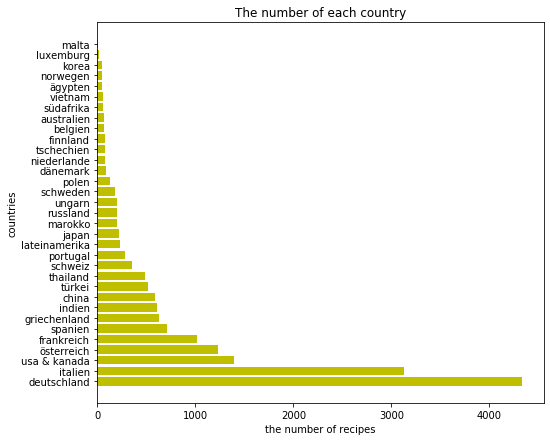

In [15]:
plt.figure(figsize=(8, 7))
plt.barh('countries', 'recipe_name', data = data_country_1, color = 'y')
plt.xlabel("the number of recipes")
plt.ylabel("countries")
plt.title("The number of each country")
plt.show()

# General recipes distribution in different regions

In [16]:
# divide the dataset into different region groups
# data = data.droindndex = index_n)
group_region = df.groupby('region').count()
data_region = pd.DataFrame(group_region['recipe_name'])
data_region

,recipe_name
region,
afrika,424
amerika,1672
asien,2971
australien,70
europa,13496
other regions,826


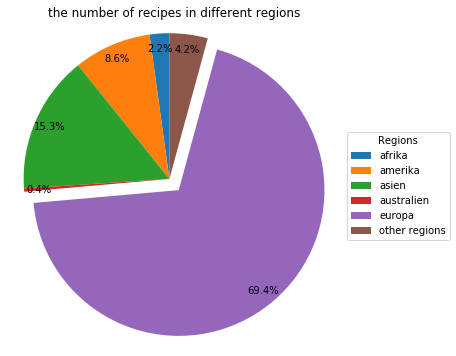

In [17]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'afrika', 'amerika', 'asien', 'australien','europa','other regions'
sizes = group_region['recipe_name']
explode = (0, 0, 0, 0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(sizes, explode=explode, autopct='%1.1f%%',pctdistance= .9,
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.legend(labels,
          title="Regions",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

ax1.set_title("the number of recipes in different regions")

plt.show()

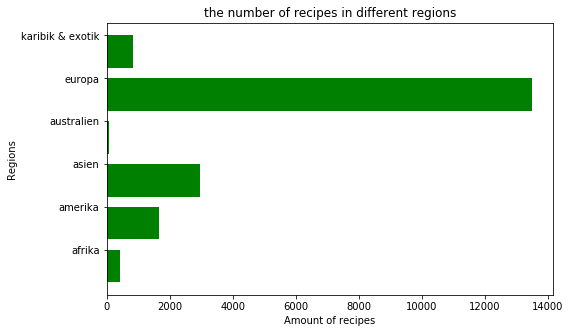

In [18]:
x = [u'afrika', u'amerika', u'asien', u'australien', u'europa', u'karibik & exotik', u'mittlerer & naher osten', u'osteuropa']
y = data_region['recipe_name']
fig, ax = plt.subplots(figsize=(8, 5))    

width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="green")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('the number of recipes in different regions')
plt.xlabel('Amount of recipes')
plt.ylabel('Regions')
plt.show()

# Recipe Rating Distribution based on average score

In [19]:
# delete the recipes, which have no average score.
df_avg = remove_null(df,'avg_score')
df_avg = remove_item(df_avg,'avg_score')

# df_avg = df_avg.set_index(["avg_score"])
# df_avg
avg_count = df_avg['avg_score'].value_counts()
df_avg_count = avg_count.to_frame()
df_avg_count['score'] = avg_count.index.tolist()
# df_avg_count

# df_avg_count = df_avg_count.set_index(["avg_score"])
# df_avg_count
# list_count = avg_count.values.tolist()
# list_count
# list_score = avg_count.index.tolist()
# list_score


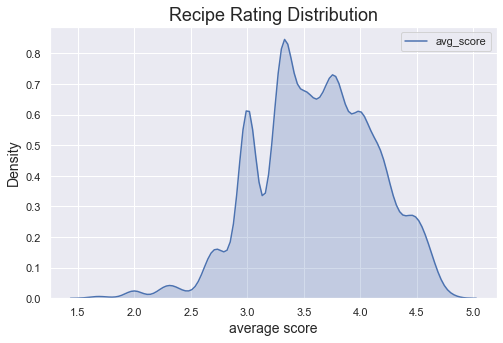

In [20]:
plt.figure(figsize=(8, 5))
sns.set()
sns.kdeplot(df_avg['avg_score'], shade=True)
plt.title('Recipe Rating Distribution', fontsize=18)
# plt.xlim(-0.5,5.5,0.8)
plt.ylabel('Density',fontsize=14)
plt.xlabel('average score',fontsize=14)
plt.show()

# preparation time of recipes in different regions

In [21]:
# delete recipes, which has the most high preparation time but only one
df_time = remove_null(df,'preparation_time')
df_time = remove_item(df,'preparation_time')
df_time = df.groupby('preparation_time').filter(lambda x: len(x) > 10)

# divide the recipes into different preparation time groups
def pre_time_group(pre_time):   
    pre_time = int(pre_time)    
    if pre_time < 20:
        bucket = '<20 Min'    
    if pre_time in range(20, 41):
        bucket = '20-40 Min'        
    if pre_time in range(40, 61):
        bucket = '40-60 Min'        
    if pre_time in range(60, 81):
        bucket = '60-80 Min'
    if pre_time >= 81:
        bucket = '80+ Min'
    return bucket

df_time['pretime_group'] = df_time['pre_time'].apply(pre_time_group)
df_time 

/Users/sunwen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,categorize,recipe_name,tags,avg_score,difficulty,ingredient,rating_count,calorie,preparation_time,comment_user,recipe_url,pre_time,calorie_value,region,country,pretime_group
recipe_id,,,,,,,,,,,,,,,,
2040681330443605,Regional,Hummus bi Tahin,"['Gemüse', 'Vorspeise', 'kalt', 'Vegetarisch',...",3.5,simpel,"['400g', 'Kichererbsen,vorgekocht', '100g', 'S...",4,80kcal,15 Min,"[{'rating': 'rating-5', 'comment_time': '08.04...",https://www.chefkoch.de/rezepte/20406813304436...,15,80,other regions,None,<20 Min
2419341381906336,Regional,Pizza bianca,"['Hauptspeise', 'Backen', 'Italien', 'Europa',...",3.5,normal,"['400g', 'Mehl', '6EL', 'Sonnenblumenöl,oderDi...",2,none,30 Min,"[{'rating': 'rating-4', 'comment_time': '18.03...",https://www.chefkoch.de/rezepte/24193413819063...,30,NaN,europa,italien,20-40 Min
2208861353879796,Regional,Bibbeleskäse,"['Sommer', 'Europa', 'Vegetarisch', 'Deutschla...",3.5,simpel,"['1.000g', 'Quark', '1Becher', 'Sahne', '1', '...",2,none,20 Min,"[{'rating': 'rating-5', 'comment_time': '15.05...",https://www.chefkoch.de/rezepte/22088613538797...,20,NaN,europa,deutschland,20-40 Min
600611159796275,Regional,Peixe pescador com grão de bico,"['Hauptspeise', 'Europa', 'Fisch', 'Dünsten', ...",3.5,normal,"['400g', 'Kichererbsen,überNachteingeweicht', ...",2,none,20 Min,"[{'rating': 'rating-5', 'comment_time': '09.03...",https://www.chefkoch.de/rezepte/60061115979627...,20,NaN,europa,portugal,20-40 Min
614871161520252,Regional,Bienenstich mit Sahne - Galetta - Füllung,"['Backen', 'Europa', 'Deutschland', 'Torte']",3.5,normal,"['4', 'Ei(er)', '200g', 'Zucker', '100g', 'Meh...",2,none,60 Min,"[{'rating': 'rating-4', 'comment_time': '11.05...",https://www.chefkoch.de/rezepte/61487116152025...,60,NaN,europa,deutschland,60-80 Min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011711206349324,Regional,Bananen - Walnuss - Muffins,"['Backen', 'USAoderKanada', 'Kuchen']",3.6,normal,"['330g', 'Mehl', '1TL', 'Backpulver', '1Prise(...",8,none,20 Min,"[{'rating': 'rating-2', 'comment_time': '12.08...",https://www.chefkoch.de/rezepte/10117112063493...,20,NaN,amerika,usa & kanada,20-40 Min
1035991208758269,Regional,Putengeschnetzeltes in Mango - Bananen - Kokos...,"['Asien', 'Hauptspeise', 'Schnell', 'einfach',...",3.6,simpel,"['500g', 'Putenfleisch,geschnetzelt', 'n.B.', ...",3,340kcal,30 Min,"[{'rating': 'rating-5', 'comment_time': '28.04...",https://www.chefkoch.de/rezepte/10359912087582...,30,340,asien,None,20-40 Min
1339751238801256,Regional,Bananen - Pancakes,"['USAoderKanada', 'Frühstück', 'Braten', 'Süßs...",3.6,simpel,"['125g', 'Mehl,gesiebt', '1EL', 'Zucker', '2TL...",3,none,5 Min,"[{'rating': 'rating-3', 'comment_time': '13.08...",https://www.chefkoch.de/rezepte/13397512388012...,5,NaN,amerika,usa & kanada,<20 Min


In [22]:
group_time = df_time.groupby('pretime_group').count()
data_time = pd.DataFrame(group_time['recipe_name'])
data_time = data_time.reindex(index = ['<20 Min','20-40 Min','40-60 Min','60-80 Min','80+ Min'])
data_time

,recipe_name
pretime_group,
<20 Min,4891
20-40 Min,11531
40-60 Min,2539
60-80 Min,1104
80+ Min,257


Text(0.5, 1.0, 'preparation time distribution')

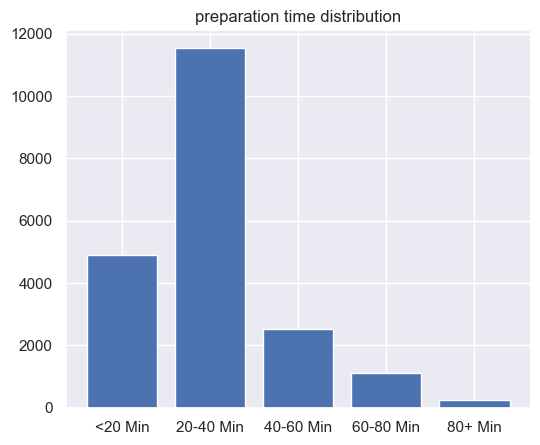

In [23]:
fig, axes = plt.subplots(figsize=(6,5), dpi=100)
plt.bar(data_time.index, height=data_time.recipe_name)
plt.title('preparation time distribution')

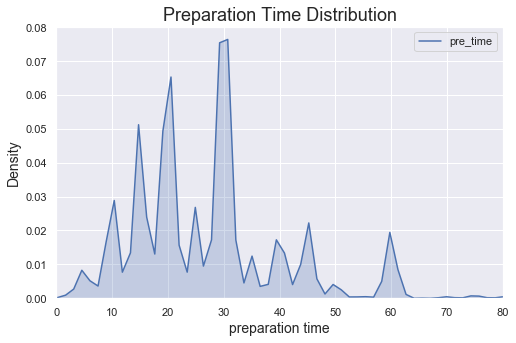

In [24]:
threshold=80
plt.figure(figsize=(8, 5))
sns.set()
sns.kdeplot(df_time['pre_time'], shade=True)
plt.title('Preparation Time Distribution', fontsize=18)
# plt.xlim(-0.5,5.5,0.8)
plt.ylabel('Density',fontsize=14)
plt.xlabel('preparation time',fontsize=14)
plt.xlim(0,threshold)
plt.show()

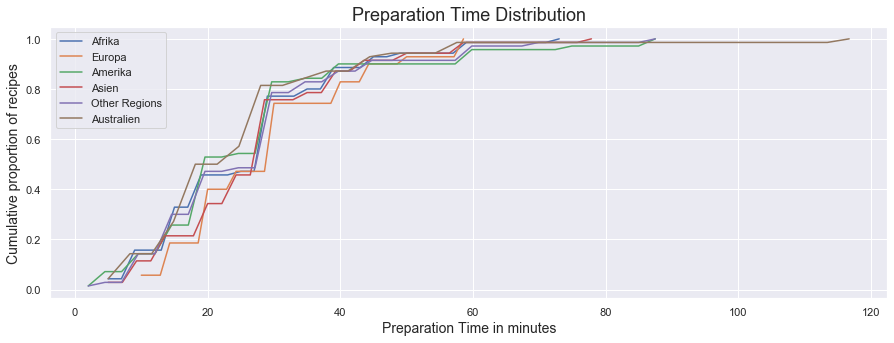

In [25]:
# Plot the cooking time's cumulative distribution for a sample of european and asian countries.
plt.figure(figsize=(15,5))
x1 = list(df_time[df_time['region'] == 'afrika']['pre_time'])
x2 = list(df_time[df_time['region'] == 'europa']['pre_time'])
x3 = list(df_time[df_time['region'] == 'amerika']['pre_time'])
x4 = list(df_time[df_time['region'] == 'asien']['pre_time'])
x5 = list(df_time[df_time['region'] == 'other regions']['pre_time'])
x6 = list(df_time[df_time['region'] == 'australien']['pre_time'])
# x7 = list(df_time[df_time['region'] == 'osteuropa']['pre_time'])
# x8 = list(df_time[df_time['region'] == 'australien']['pre_time'])

pretime_sample = pd.concat([pd.DataFrame({'afrika': x1}), 
                            pd.DataFrame({'europa':x2}), 
                            pd.DataFrame({'amerika':x3}),
                            pd.DataFrame({'asien':x4}),
                            pd.DataFrame({'other regions':x5}),
                            pd.DataFrame({'australien':x6})], axis=1)
pretime_sample = pretime_sample.dropna()
pretime_sample
# For each cuisine compute the cumulative distribution of the preparation time and plot it.
for item in pretime_sample:
    pre = pretime_sample[item].astype(np.float)
    prep_times = pretime_sample[item].astype(np.float)
    values, base = np.histogram(prep_times, bins=35)
    # Compute the cumulative distribution
    cumulative = np.cumsum(values)
    cumulative = cumulative/cumulative.max()
    ax = plt.plot(base[:-1], cumulative)

plt.ylabel("Cumulative proportion of recipes", fontsize=14)
plt.xlabel("Preparation Time in minutes", fontsize=14)
plt.legend([c_title.title() for c_title in pretime_sample])
plt.title('Preparation Time Distribution',fontsize=18)
plt.grid(True)

# Who eat what in different regional recipes

In [26]:
# extract comment user dataset from original dataset
def extract_com_user(data):
    df_com = pd.DataFrame()
    for index, item in data['comment_user'].iteritems():
        if (item != '[]'):
            if (item != 'no comment'):
                array = ast.literal_eval(item)
                df_array = pd.DataFrame(array)
                df_array['recipe_id'] = index
                df_com = pd.concat([df_com,df_array])
    return df_com

In [27]:
def sub_cat_in_com(data):
    list_sub_cat = []
    list_country = []
    df_com2 = pd.DataFrame()
    for index_1, item_1 in data['region'].iteritems(): 
        if (item_1 != None):
            list_sub = list(item_1)
            list_sub = ''.join(x for x in list_sub if x not in punct)
            list_sub_cat.append(list_sub)
    df_sub_cat = pd.DataFrame(list_sub_cat)
    df_sub_cat['region'] = df_sub_cat

    for index, item in data['country'].iteritems(): 
        if (item != None):
            list_cou = list(item)
            list_cou = ''.join(x for x in list_cou if x not in punct)

            list_country.append(list_cou)

    df_cou = pd.DataFrame(list_country)
    df_sub_cat['country'] = df_cou
    df_sub_cat['recipe_id'] = data['region'].index     
    df_com2 = pd.concat([df_com2,df_sub_cat])
    return df_com2

In [28]:
data_com = df[['comment_user','region','country']]
data_com = data_com[0:300]
# remove None value in dataset
data_com = data_com.dropna(subset=['region'])
data_com = data_com.dropna(subset=['country'])

df_com = extract_com_user(data_com)
df_com2 = sub_cat_in_com(data_com)

df_com_new = df_com.merge(df_com2, on='recipe_id', how='left')
df_com_new = df_com_new.drop(0, 1)
df_com_new = df_com_new[['recipe_id','name','rating','sex','age','marriage_status','job','country','region','comment_time']]

df_com_new.dropna()
df_com_new

,recipe_id,name,rating,sex,age,marriage_status,job,country,region,comment_time
0,2419341381906336,Parmigiana,rating-4,weiblich,None,None,selbständig/freiberuflich,italien,europa,18.03.2020 17:16
1,2419341381906336,bahnhof1,rating-5,None,None,None,vielseitig,italien,europa,05.04.2014 14:30
2,2208861353879796,nutellaweggle,rating-5,männlich,58 Jahre,None,None,deutschland,europa,15.05.2019 18:24
3,600611159796275,heimwerkerkönig,rating-5,None,None,None,EDV-Bereich,portugal,europa,09.03.2007 23:24
4,600611159796275,JuanaLaLoca,rating-4,weiblich,57 Jahre,Verheiratet,selbständig,portugal,europa,09.03.2007 15:55
...,...,...,...,...,...,...,...,...,...,...
905,1980011321290118,Painter,rating-4,None,None,Verheiratet,Maler,deutschland,europa,15.02.2017 16:02
906,50531017741110,cubanita-rubia,rating-3,weiblich,None,Vergeben,None,deutschland,europa,01.02.2008 18:27
907,2264321361818419,steilwandfahrer,rating-4,männlich,49 Jahre,None,None,spanien,europa,15.11.2017 16:08
908,676041169916239,kleines73,rating-4,weiblich,47 Jahre,Verheiratet,Hausfrau,portugal,europa,15.03.2016 13:48


In [29]:
df_com_new["age_num"] = df_com_new["age"].str.extract(pat, flags=0, expand=True)
df_com_new["rating_num"] = df_com_new["rating"].str.extract(pat, flags=0, expand=True)
df_com_new

,recipe_id,name,rating,sex,age,marriage_status,job,country,region,comment_time,age_num,rating_num
0,2419341381906336,Parmigiana,rating-4,weiblich,None,None,selbständig/freiberuflich,italien,europa,18.03.2020 17:16,NaN,4
1,2419341381906336,bahnhof1,rating-5,None,None,None,vielseitig,italien,europa,05.04.2014 14:30,NaN,5
2,2208861353879796,nutellaweggle,rating-5,männlich,58 Jahre,None,None,deutschland,europa,15.05.2019 18:24,58,5
3,600611159796275,heimwerkerkönig,rating-5,None,None,None,EDV-Bereich,portugal,europa,09.03.2007 23:24,NaN,5
4,600611159796275,JuanaLaLoca,rating-4,weiblich,57 Jahre,Verheiratet,selbständig,portugal,europa,09.03.2007 15:55,57,4
...,...,...,...,...,...,...,...,...,...,...,...,...
905,1980011321290118,Painter,rating-4,None,None,Verheiratet,Maler,deutschland,europa,15.02.2017 16:02,NaN,4
906,50531017741110,cubanita-rubia,rating-3,weiblich,None,Vergeben,None,deutschland,europa,01.02.2008 18:27,NaN,3
907,2264321361818419,steilwandfahrer,rating-4,männlich,49 Jahre,None,None,spanien,europa,15.11.2017 16:08,49,4
908,676041169916239,kleines73,rating-4,weiblich,47 Jahre,Verheiratet,Hausfrau,portugal,europa,15.03.2016 13:48,47,4


In [30]:
df_null_age = df_com_new[df_com_new['age'] =='None']
df_null_age
index_a = df_null_age.index.tolist()
df_age = df_com_new.drop(index =index_a)
df_age["age_num"] = df_age["age"].str.extract(pat, flags=0, expand=True)
df_age

,recipe_id,name,rating,sex,age,marriage_status,job,country,region,comment_time,age_num,rating_num
2,2208861353879796,nutellaweggle,rating-5,männlich,58 Jahre,None,None,deutschland,europa,15.05.2019 18:24,58,5
4,600611159796275,JuanaLaLoca,rating-4,weiblich,57 Jahre,Verheiratet,selbständig,portugal,europa,09.03.2007 15:55,57,4
6,614871161520252,vfb-moni,rating-5,weiblich,60 Jahre,Single,Sekretärin,deutschland,europa,30.12.2012 12:03,60,5
10,672271169457115,obersteirerin29,rating-4,weiblich,40 Jahre,Single,None,österreich,europa,20.04.2015 21:38,40,4
12,543361151822745,Archeheike,rating-5,weiblich,52 Jahre,None,Finanzbuchhalterin,deutschland,europa,08.07.2017 21:44,52,5
...,...,...,...,...,...,...,...,...,...,...,...,...
900,353231120642957,Baddy,rating-4,männlich,66 Jahre,Verheiratet,Aufzugsrevisor und Schlosser,deutschland,europa,02.04.2008 13:14,66,4
901,519451148204801,urmelhelble,rating-2,weiblich,56 Jahre,Single,None,deutschland,europa,15.06.2012 21:49,56,2
902,1133271219673373,loewenfrau,rating-3,weiblich,55 Jahre,Verheiratet,Allrounderin,österreich,europa,08.03.2015 14:34,55,3
907,2264321361818419,steilwandfahrer,rating-4,männlich,49 Jahre,None,None,spanien,europa,15.11.2017 16:08,49,4


In [31]:
def age_group(age):   
    age = int(age)    
    if age < 30:
        bucket = '<30 Jahre'    
    if age in range(30, 41):
        bucket = '30-40 Jahre'        
    if age in range(40, 51):
        bucket = '40-50 Jahre'        
    if age in range(50, 61):
        bucket = '50-60 Jahre'
    if age >= 61:
        bucket = '60+ Jahre'
    return bucket

In [131]:
df_age['age_group'] = df_age['age_num'].apply(age_group)
df_age = df_age.groupby('country').filter(lambda x: len(x) > 5)

group_age = df_age.groupby(['age_group','country']).count()

group_age_1 = group_age['rating']
group_age_1
df_group_age_1 = pd.DataFrame(group_age_1)
df_group_age_1

df_1 = df_group_age_1.iloc[0:10]
# df_1['sum'] = '136'

# df_1['scaled'] = df_1.apply(lambda x: x['rating'] / x['sum'], axis=1)
# df_1['scaled'] = df_1['rating'] / df_1['sum']
df_1


# # df_group_age_1['scaled_counts'] = preprocessing.scale(df_group_age_1['rating'])

# max_min_scalercaler = lambda x : (x-np.min(x))/(np.max(x)-np.min(x))

# mean_tmp = np.mean(np.array(df_group_age_1['rating']))
# std_tmp = np.std(np.array(df_group_age_1['rating']))
# standardization = lambda x: (x - mean_tmp) / std_tmp

# # df_group_age_1['scaled_counts'] = df_group_age_1[['rating']].apply(standardization)

# df_group_age_1['scaled_counts'] = df_group_age_1[['rating']].apply(max_min_scalercaler)

# df_group_age_1 = df_group_age_1.drop('rating', 1)
# df_group_age_1


rating
age_group   country              
30-40 Jahre china               3
            deutschland        42
            griechenland        7
            italien            58
            lateinamerika       6
            schweden            3
            schweiz             1
            spanien             4
            usa  kanada         4
            österreich          8

Text(0.5, 1.0, 'Age group Distribution')

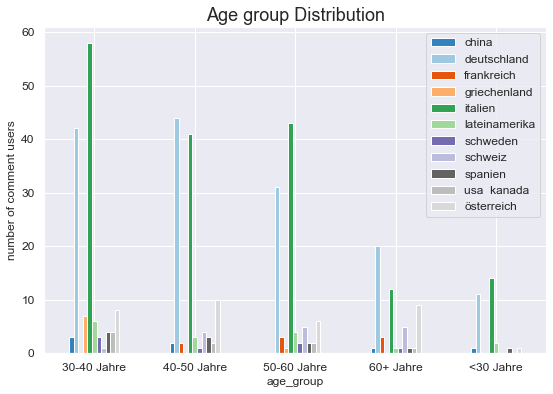

In [107]:

fig, ax = subplots()
group_age_1.unstack().plot(kind='bar',ax=ax, fontsize = 12,figsize=(9,6),rot=0, colormap='tab20c')
ax.legend(fontsize=12)
plt.ylabel('number of comment users')
# plt.xlim(0,threshold)
plt.title('Age group Distribution',fontsize=18)


# the correlation among different sub groups

In [ ]:
cat_df_com_new = df_com_new.select_dtypes(include=['object']).copy()
cat_df_com_new = cat_df_com_new.drop(['comment_time', 'age_num','rating_num'], 1)
cat_df_com_new

In [ ]:

# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap

corr = df_com_new.corr()

# ax = sns.heatmap(
#     corr, 
#     vmin=-1, vmax=1, center=0,
#     cmap=sns.diverging_palette(20, 220, n=200),
#     square=True
# )
# ax.set_xticklabels(
#     ax.get_xticklabels(),
#     rotation=45,
#     horizontalalignment='right'
# );

In [ ]:
# df_com_new = df_com_new.drop_duplicates(['name'])
df_com_sex = remove_None(df_com_new, 'sex')
# df_com_sex.shape
# df_com_sex = df_com_sex.get_dummies(df_com_sex['sex'])
df_com_sex = pd.get_dummies(df_com_sex['sex'])
df_com_sex

In [ ]:
# df_com_age = remove_None(df_com_sex, 'age')

# df_com_age.shape

# Which tags are associated with countries?
refers to: https://intelligentonlinetools.com/blog/2018/02/10/how-to-create-data-visualization-for-association-rules-in-data-mining/

In [103]:
def europa_tags(data):
    tags_collection = []
    for i in range(len(data)):
        tags = data.loc[i]["tags"]
        tags = tags_preprocess(tags)
        
#         if "deutschland" in tags:
#             tags_collection.append(tags[1:])
#         if "italien" in tags:
#             tags_collection.append(tags[1:])
        if "frankreich" in tags:
            tags_collection.append(tags[1:])
        if "spanien" in tags:
            tags_collection.append(tags[1:])
        if "griechenland" in tags:
            tags_collection.append(tags[1:])
        if "schweiz" in tags:
            tags_collection.append(tags[1:])
        if "portugal" in tags:
            tags_collection.append(tags[1:])
        if "ungarn" in tags:
            tags_collection.append(tags[1:])
        if "schweden" in tags:
            tags_collection.append(tags[1:])
        if "polen" in tags:
            tags_collection.append(tags[1:])
        if "dänemark" in tags:
            tags_collection.append(tags[1:])
        if "tschechien" in tags:
            tags_collection.append(tags[1:])
        if "niederlande" in tags:
            tags_collection.append(tags[1:])
        if "finnland" in tags:
            tags_collection.append(tags[1:])
        if "belgien" in tags:
            tags_collection.append(tags[1:])
        if "russland" in tags:
            tags_collection.append(tags[1:])
        if "norwegen" in tags:
            tags_collection.append(tags[1:])
        if "luxemburg" in tags:
            tags_collection.append(tags[1:])
        if "türkei" in tags:
            tags_collection.append(tags[1:])
        if "malta" in tags:
            tags_collection.append(tags[1:])
    
    return pd.DataFrame(data=tags_collection)

In [83]:
def asien_tags(data):
    tags_collection = []
    for i in range(len(data)):
        tags = data.loc[i]["tags"]
        tags = tags_preprocess(tags)
        
        if "indien" in tags:
            tags_collection.append(tags[1:])
        if "china" in tags:
            tags_collection.append(tags[1:])
        if "thailand" in tags:
            tags_collection.append(tags[1:])
        if "japan" in tags:
            tags_collection.append(tags[1:])
        if "korea" in tags:
            tags_collection.append(tags[1:])
        if "vietnam" in tags:
            tags_collection.append(tags[1:])
    return pd.DataFrame(data=tags_collection)

In [85]:
def extract_unique_items(data):
    column_values = data[list(data.columns)].values.ravel()
    # column_values
    unique_values = pd.unique(column_values)
    items = list(unique_values)
    items.remove(None)
    return items
    

In [90]:
def one_hot_embedding(data, items):
    encoded_vals = []

    for index, row in data.iterrows():
        labels = {}
        uncommons = list(set(items) - set(row))
        commons = list(set(items).intersection(row))
        for uc in uncommons:
            labels[uc] = 0
        for com in commons:
            labels[com] = 1
        encoded_vals.append(labels)
        
    # return in form of dataframe
    return pd.DataFrame(encoded_vals)

In [106]:
# associate rules of each country in Europa
# df.reset_index(inplace = True)
df_europa = europa_tags(df)
euro_uni = extract_unique_items(df_europa)
ohe_df_europa = one_hot_embedding(df_europa, euro_uni)
freq_items = apriori(ohe_df_europa, min_support=0.1, use_colnames=True)
print(freq_items)
# association_rules(freq_items, metric="confidence", min_threshold=0.08)
# rules = association_rules(freq_items, metric="lift", min_threshold=0.5)


rules = association_rules(freq_items, metric="confidence", min_threshold=0.08)
print(rules)
# rules[rules['antecedents'] == {"herbst"}]
# rules[rules['antecedents'] == {"herbst"}]
# rules[rules['antecedents'] == {"italien"}]
rules[rules['antecedents'] == {"spanien"}]

     support                    itemsets
0   0.115768                      (rind)
1   0.140871              (griechenland)
2   0.109336                    (türkei)
3   0.106017                    (herbst)
4   0.187344                   (gekocht)
5   0.108299                      (warm)
6   0.223859                (frankreich)
7   0.150207                   (spanien)
8   0.125934   (raffiniertoderpreiswert)
9   0.210373                   (schnell)
10  0.131743                   (lactose)
11  0.135685                     (snack)
12  0.119917                   (schwein)
13  0.279253               (hauptspeise)
14  0.217220                   (einfach)
15  0.269917               (vegetarisch)
16  0.103112                    (gluten)
17  0.128008                     (party)
18  0.134025                    (braten)
19  0.756017                    (europa)
20  0.128838      (griechenland, europa)
21  0.129046           (gekocht, europa)
22  0.197718        (frankreich, europa)
23  0.132158    

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(spanien),(europa),0.150207,0.756017,0.132158,0.879834,1.163776,0.018598,2.030391


In [77]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.05)
# rules[rules['antecedents'] == {"herbst"}]
# rules[rules['antecedents'] == {"herbst"}]
# rules[rules['antecedents'] == {"italien"}]
rules[rules['antecedents'] == {"deutschland"}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(deutschland),(gekocht),0.360367,0.253319,0.104544,0.290105,1.145216,0.013257,1.051819
12,(deutschland),(schnell),0.360367,0.262423,0.104620,0.290316,1.106289,0.010052,1.039303
14,(deutschland),(hauptspeise),0.360367,0.316744,0.108338,0.300632,0.949132,-0.005806,0.976962
16,(deutschland),(einfach),0.360367,0.270086,0.108110,0.300000,1.110758,0.010780,1.042735
18,(deutschland),(europa),0.360367,0.693726,0.316744,0.878947,1.266995,0.066748,2.530091
41,(deutschland),"(einfach, schnell)",0.360367,0.262423,0.104620,0.290316,1.106289,0.010052,1.039303
47,(deutschland),"(hauptspeise, europa)",0.360367,0.229573,0.108338,0.300632,1.309526,0.025607,1.101604
